##**Hand Tracking System**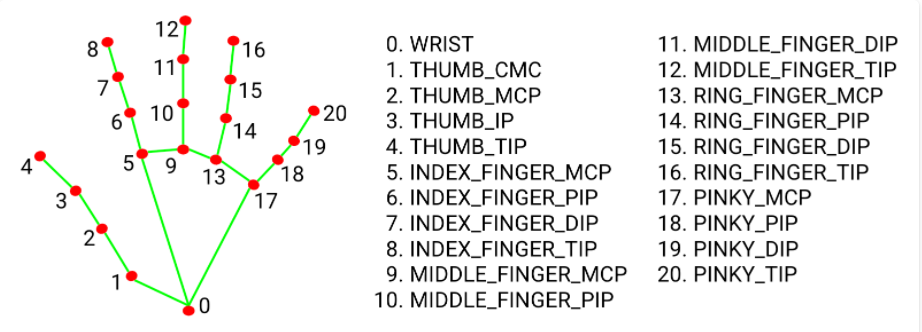

In [1]:
# libraries
import cv2
from cvzone.HandTrackingModule import HandDetector
import time
import os
import keyboard

In [2]:
def PressKey(key):
    os.system(f'osascript -e \'tell application "System Events" to key code {key}\'')

def ReleaseKey(key):
    os.system(f'osascript -e \'tell application "System Events" to key up code {key}\'')

# simulate pressing space bar on macOS
def spacePressed():
    PressKey(49)
    ReleaseKey(49)
    time.sleep(0.1)

In [ ]:
# initialize detector and other variables
detector = HandDetector(maxHands=1, detectionCon=0.8)
time.sleep(1.0)
current_key_pressed = set()
space_key_pressed = 49

# enable webcam
video = cv2.VideoCapture(0)

def handleKeyPress(fingerUp, frame, space_key_pressed, current_key_pressed):
   if fingerUp == [0, 0, 0, 0, 0]:
       cv2.putText(frame, 'Not Jumping', (frame.shape[1] - 250, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
       cv2.putText(frame, f'Finger Count: 0', (20, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

   elif fingerUp in [[0, 1, 0, 0, 0], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 1, 1, 1, 1]]:
       cv2.putText(frame, f'Finger Count: {fingerUp.count(1)}', (20, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
       cv2.putText(frame, 'Jumping', (frame.shape[1] - 200, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 50, 225), 2, cv2.LINE_AA)

       PressKey(space_key_pressed)
       spacePressed = True
       current_key_pressed.add(space_key_pressed)
       key_pressed = space_key_pressed

# main loop
while True:
   ret, frame = video.read()
   hands, img = detector.findHands(frame)

   if hands:
       lmList = hands[0]
       fingerUp = detector.fingersUp(lmList)
       handleKeyPress(fingerUp, frame, space_key_pressed, current_key_pressed)
       print(fingerUp)

   cv2.imshow("Frame", frame)
   k = cv2.waitKey(1)

   # break loop if 'q' is pressed
   if k == ord('q'):
       break

video.release()
cv2.destroyAllWindows()